In [1]:
import os
import pandas as pd

In [3]:
df = pd.read_parquet(os.path.join("data","jizdenky.parquet"))

In [39]:
df['predstih_d'] = df['predstih'].dt.days
df['predstih_h'] = df['predstih'].dt.total_seconds() / 3600

In [13]:
df.groupby(['odkud','kam'])['cena'].max().nlargest(10)

odkud              kam               
Praha hl.n.        Amsterdam Centraal    11644.0
Brno hl.n.         Hamburg Hbf            9814.0
Berlin Hbf (tief)  Amsterdam Centraal     8488.0
Berlin Hbf         Bruxelles-Midi         7412.0
Praha hl.n.        Bruxelles-Midi         7322.0
Berlin Hbf         Hamburg Hbf            7018.0
Berlin Hbf (tief)  Hamburg Hbf            7018.0
Praha hl.n.        Bern                   6894.0
Berlin Hbf         Amsterdam Zuid         6852.0
České Budějovice   Zürich HB              6827.0
Name: cena, dtype: float64

In [17]:
df.groupby(['odkud','kam'])['cena'].min().nlargest(20)

odkud               kam                   
Berlin Hbf          Hamburg Hbf               7018.0
                    Bruxelles-Central         6814.0
Praha-Smíchov       Bruxelles-Midi            6543.0
Frankfurt(Main)Hbf  Bruxelles-Midi            6244.0
                    Amsterdam Centraal        6215.0
Berlin Hbf (tief)   Amsterdam Centraal        5578.0
Leipzig Hbf (tief)  Amsterdam Centraal        5578.0
Praha hl.n.         Amsterdam Zuid            5477.0
                    Berlin Ostbahnhof         4149.0
Leipzig Hbf (tief)  Berlin Hbf (tief)         3277.0
                    Berlin Südkreuz           3277.0
Praha-Dejvice       Budapest-Kelenföld        2974.0
Praha hl.n.         Budapest-Kelenföld        2495.0
                    Bern                      2387.0
Berlin Hbf          Bruxelles-Midi            2116.0
Praha hl.n.         Bratislava-Petržalka      2085.0
Berlin Hbf          Amsterdam Centraal        2038.0
                    Amsterdam Zuid            2038.0
Pra

In [21]:
df[df['odkud'].str.contains('Praha')].groupby('kam')['cena'].max().nlargest(20)

kam
Amsterdam Centraal        11644.0
Bruxelles-Midi             7322.0
Bern                       6894.0
Amsterdam Zuid             6311.0
Berlin Hbf (tief)          5181.0
Warszawa Centralna         4324.0
Berlin Ostbahnhof          4149.0
Ljubljana                  3824.0
Zagreb Glavni kolodvor     3622.0
Berlin Gesundbrunnen       3277.0
Berlin Hbf                 3277.0
Berlin Südkreuz            3277.0
Budapest-Kelenföld         3008.0
Warszawa Wschodnia         2205.0
Bratislava-Petržalka       2085.0
Budapest-Nyugati pu        1922.0
Bratislava hl.st.          1586.0
Wien Hbf                   1550.0
Berlin-Lichtenberg         1393.0
Ostrava hl.n.              1269.0
Name: cena, dtype: float64

In [31]:
df[df['odkud'].str.contains('Praha')].groupby(['kam','prodejce'])['cena'].min().nsmallest(40)

kam                            prodejce
Ostrava hl.n.                  LEO           99.0
Ostrava-Svinov                 LEO           99.0
Brno                           RJ            99.0
Tanvald                        ARR          160.0
České Budějovice               ARR          200.0
Brno hl.n.                     ČD           269.0
Ostrava-Svinov                 ČD           289.0
Ostrava hl.n.                  ČD           289.0
Plzeň hl.n.                    ČD           350.0
Wien Hbf                       ČD           387.0
Berlin Hbf (tief)              ČD           387.0
Berlin Südkreuz                ČD           387.0
Košice                         RJ           399.0
Budapešť                       RJ           399.0
Bratislava hl.st.              ČD           400.0
Wien Franz-Josefs-Bahnhof      ČD           439.0
Warszawa Centralna             ČD           490.0
Čop                            RJ           499.0
Budapest-Nyugati pu            ČD           606.0
Berlin Hbf

In [35]:
df[df['odkud'].str.contains('Brno')].groupby(['kam','prodejce'])['cena'].min().nsmallest(50)

kam               prodejce
Praha             RJ            99.0
Vídeň             RJ           149.0
Praha hl.n.       ČD           269.0
Praha-Holešovice  ČD           479.0
Hamburg Hbf       ČD           645.0
Ljubljana         ČD          1109.0
Hamburg-Harburg   ČD             NaN
Name: cena, dtype: float64

In [41]:
df.groupby('predstih_d')['cena'].median()

predstih_d
-8        NaN
-7        NaN
-6        NaN
-5        NaN
-4        NaN
        ...  
 89    2387.0
 90    1071.0
 91       NaN
 92       NaN
 93       NaN
Name: cena, Length: 102, dtype: float64

In [43]:
df.sort_values('predstih_d')

,vlaky,prodejce,odkud,oscrapovano,kam,odjezd,predstih,vzdalenost,jizdni_doba,cena,...,prestupy,prostredek,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_d,predstih_h
385,"[R 1166, R 1168]",ARR,Praha hl.n.,2024-11-07 18:29:00,České Budějovice,2024-10-31 14:42:00,-8 days +20:13:00,187.0,311.0,NaN,...,NaN,None,None,None,NaN,NaN,NaN,NaN,-8,-171.783333
397,"[R 1166, R 1168]",ARR,Praha hl.n.,2024-11-07 18:29:01,České Budějovice,2024-10-31 14:42:00,-8 days +20:12:59,187.0,311.0,NaN,...,NaN,None,None,None,NaN,NaN,NaN,NaN,-8,-171.783611
374,[R 1164],ARR,Praha hl.n.,2024-11-07 18:29:00,České Budějovice,2024-10-31 10:42:00,-8 days +16:13:00,187.0,203.0,NaN,...,NaN,None,None,None,NaN,NaN,NaN,NaN,-8,-175.783333
421,[R 1170],ARR,Praha hl.n.,2024-11-07 18:29:01,České Budějovice,2024-10-31 16:42:00,-8 days +22:12:59,187.0,203.0,NaN,...,NaN,None,None,None,NaN,NaN,NaN,NaN,-8,-169.783611
415,[R 1164],ARR,Praha hl.n.,2024-11-07 18:29:01,České Budějovice,2024-10-31 10:42:00,-8 days +16:12:59,187.0,203.0,NaN,...,NaN,None,None,None,NaN,NaN,NaN,NaN,-8,-175.783611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,"[R 658 Bezdrev, IC 566 Západní expres, Sp 5282...",ČD,München Hbf Gl.27-36,2024-11-03 09:54:26,Zürich HB,2025-02-03 12:54:00,92 days 02:59:34,NaN,623.0,NaN,...,4.0,vlak,None,None,NaN,NaN,NaN,NaN,92,2210.992778
8953,"[EC 333 Jižní expres, rjx 166]",ČD,České Budějovice,2024-11-03 09:54:26,Zürich HB,2025-02-04 12:05:00,93 days 02:10:34,NaN,555.0,NaN,...,1.0,vlak,None,None,NaN,NaN,NaN,NaN,93,2234.176111
8940,"[Sp 3803 Vltava Dunaj, rjx 862, R 5728, IR 327...",ČD,České Budějovice,2024-11-03 09:54:26,Zürich HB,2025-02-04 10:05:00,93 days 00:10:34,NaN,617.0,NaN,...,4.0,vlak,None,None,NaN,NaN,NaN,NaN,93,2232.176111
8945,"[R 658 Bezdrev, IC 566 Západní expres, Sp 5282...",ČD,München Hbf Gl.27-36,2024-11-03 09:54:26,Zürich HB,2025-02-04 12:54:00,93 days 02:59:34,NaN,623.0,NaN,...,4.0,vlak,None,None,NaN,NaN,NaN,NaN,93,2234.992778


<Axes: xlabel='predstih_d'>

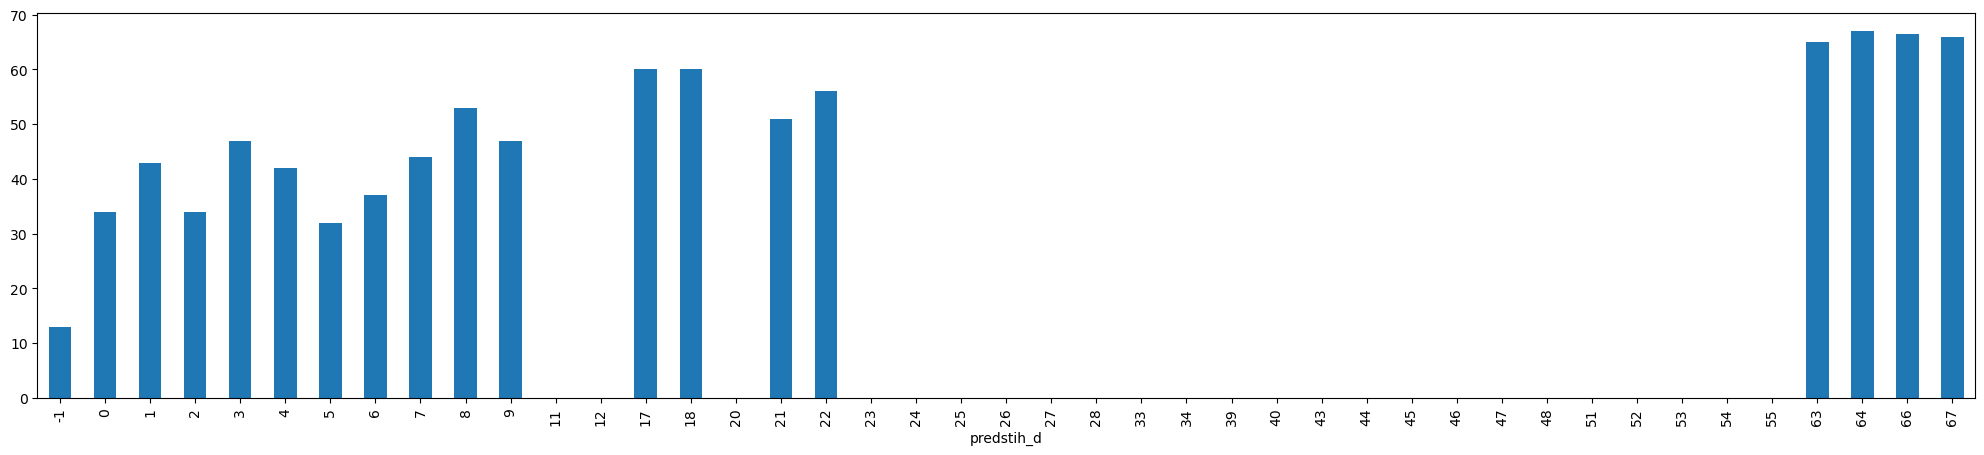

In [79]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Ostrava')].groupby('predstih_d')['volnych_mist'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

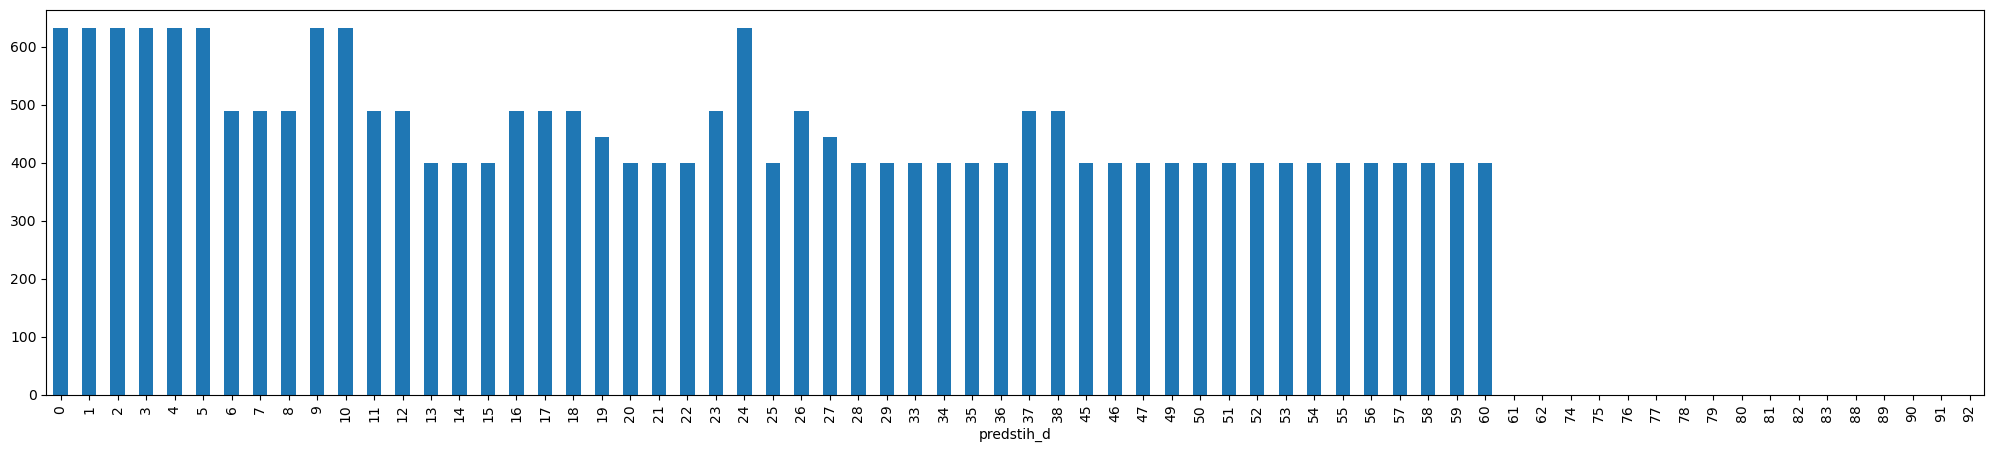

In [67]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Bratisla')].groupby('predstih_d')['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

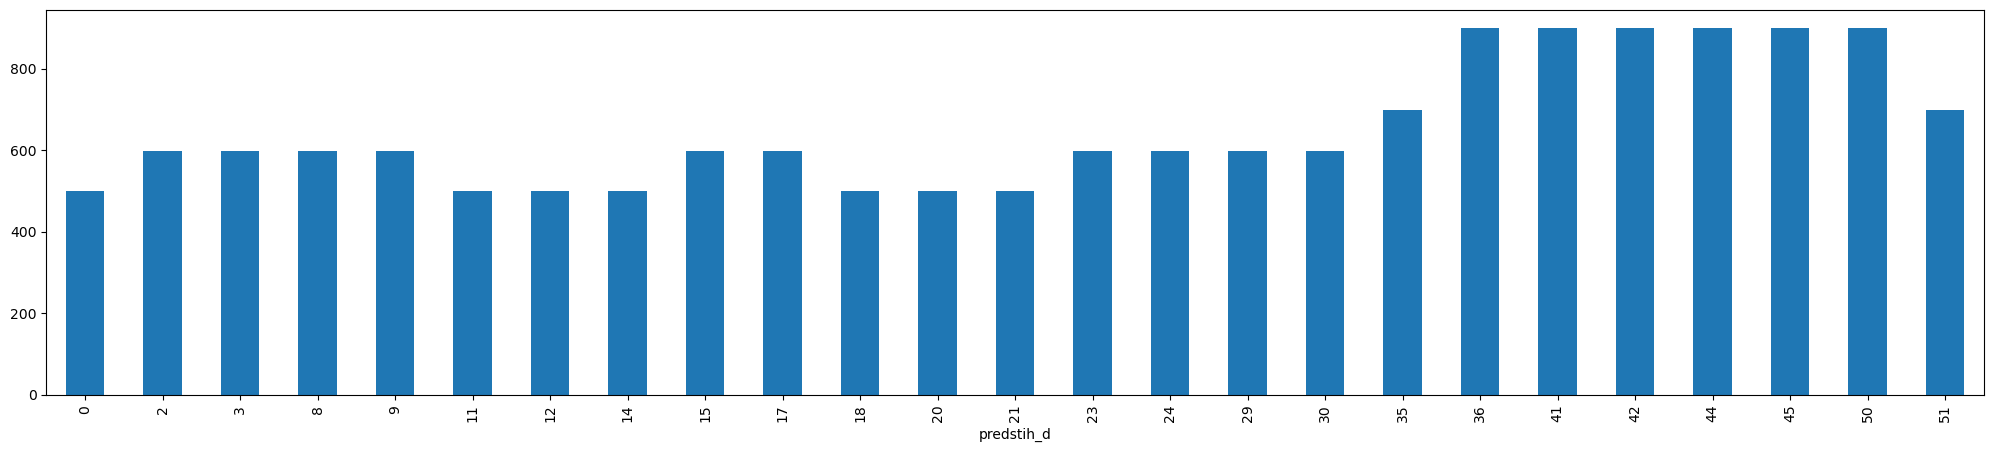

In [63]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Čop')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

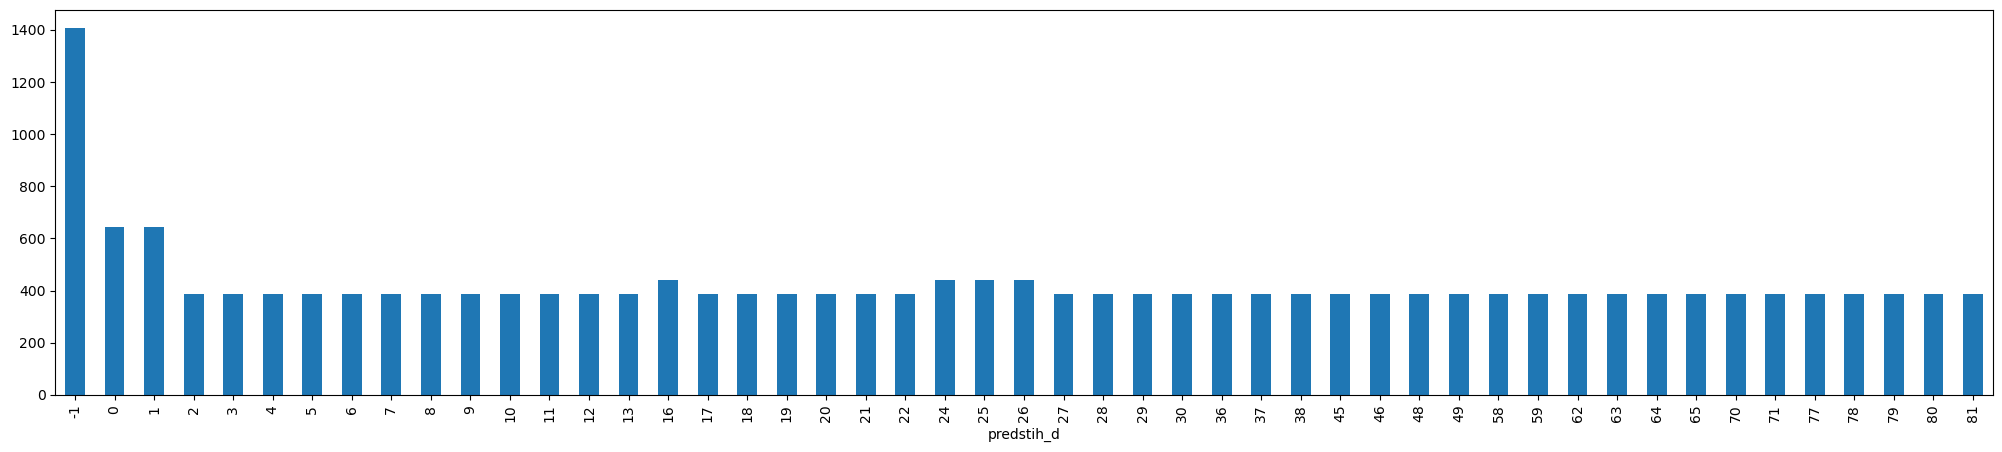

In [61]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Wien')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

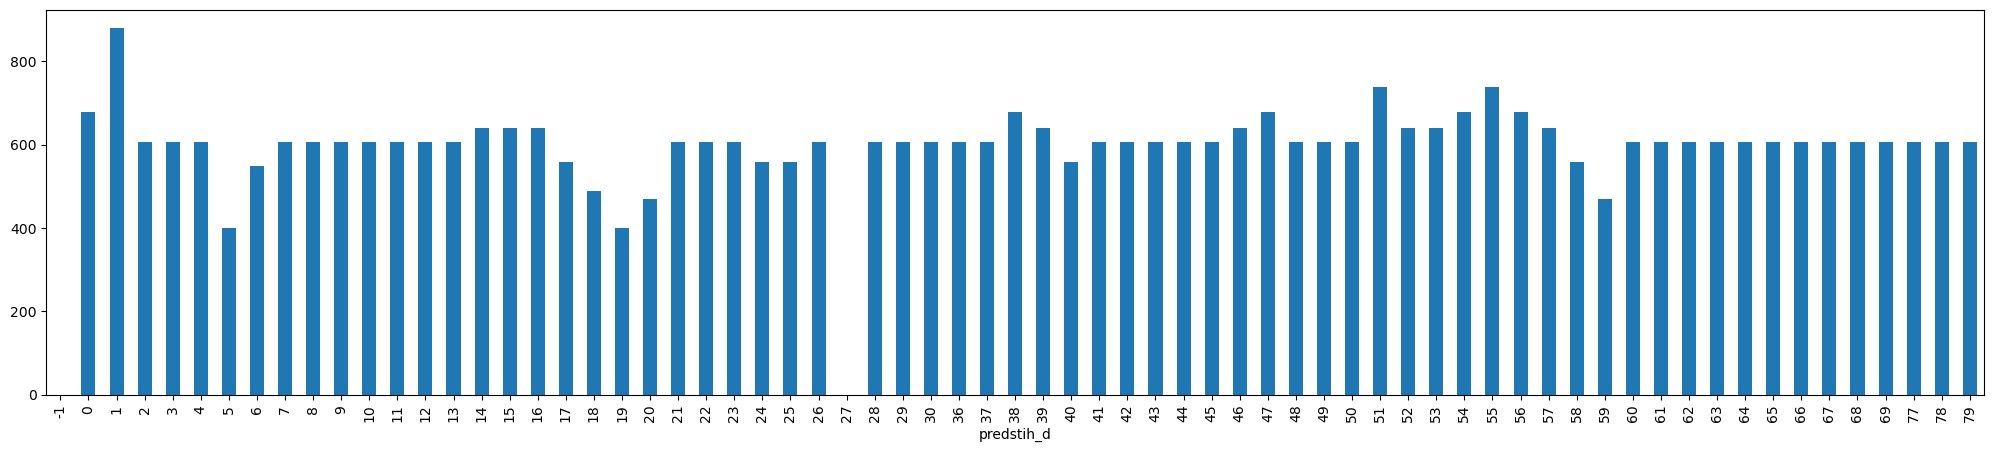

In [57]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Buda')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

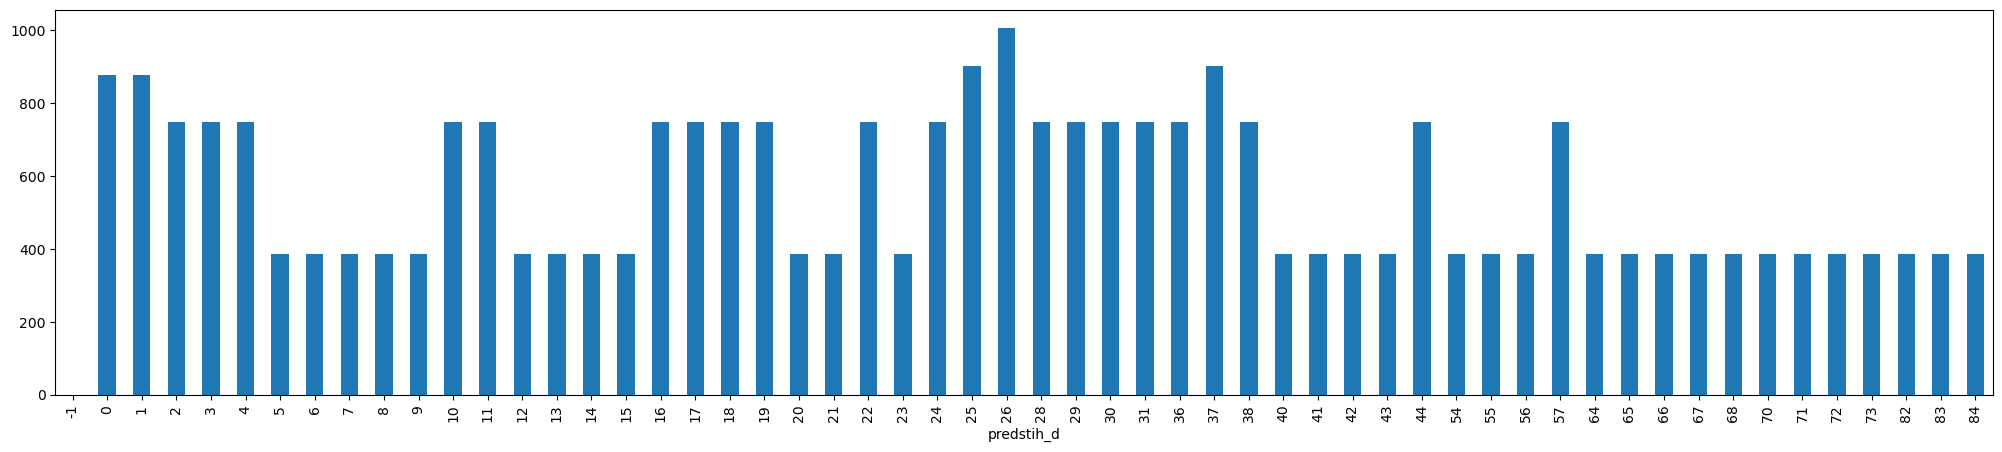

In [55]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Berl')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

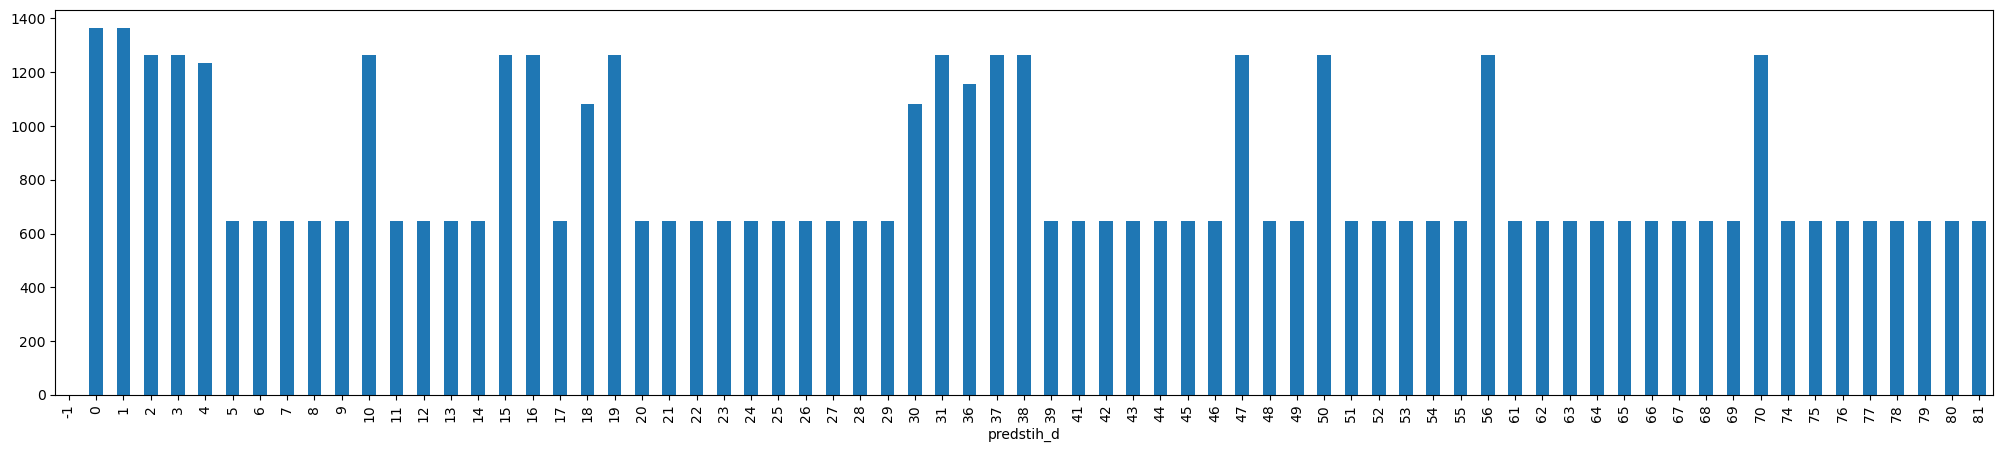

In [53]:
df[df['odkud'].str.contains('Brno') & df['kam'].str.contains('Hamb')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

In [49]:
df[df['prodejce'] == 'ARR'].groupby('predstih_d').size()

predstih_d
-8        6
-7       12
-6       25
-5       50
-4       69
-3       91
-2      116
-1      138
 0     4342
 1     4437
 2     4003
 3     3791
 4     3367
 5     3034
 6     2695
 7     2353
 8     1987
 9     1668
 10    1466
 11    1223
 12     980
 13     768
 14     586
 15     408
 16     269
 17     227
 18     184
 19     153
 20     128
 21     103
 22      92
 23      90
 24      85
 25      68
 26      62
 27      56
 28      50
 29      44
 30      36
 31      33
 32      23
 33      18
 34      15
 35       8
 36       2
dtype: int64